 # GLOBAL HAPPINESS REPORT ANALYSIS (2015–2023)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [7]:
WHR_2015=pd.read_csv(r"C:\Users\HP\Desktop\Global Happiness GDG\dataset\WHR_2015.csv")
WHR_2016=pd.read_csv(r"C:\Users\HP\Desktop\Global Happiness GDG\dataset\WHR_2016.csv")
WHR_2017=pd.read_csv(r"C:\Users\HP\Desktop\Global Happiness GDG\dataset\WHR_2017.csv")
WHR_2018=pd.read_csv(r"C:\Users\HP\Desktop\Global Happiness GDG\dataset\WHR_2018.csv")
WHR_2019=pd.read_csv(r"C:\Users\HP\Desktop\Global Happiness GDG\dataset\WHR_2019.csv")
WHR_2020=pd.read_csv(r"C:\Users\HP\Desktop\Global Happiness GDG\dataset\WHR_2020.csv")
WHR_2021=pd.read_csv(r"C:\Users\HP\Desktop\Global Happiness GDG\dataset\WHR_2021.csv")
WHR_2022=pd.read_csv(r"C:\Users\HP\Desktop\Global Happiness GDG\dataset\WHR_2022.csv")
WHR_2023=pd.read_csv(r"C:\Users\HP\Desktop\Global Happiness GDG\dataset\WHR_2023.csv")

In [8]:
WHR_2015["year"]=2015
WHR_2016["year"]=2016
WHR_2017["year"]=2017
WHR_2018["year"]=2018
WHR_2019["year"]=2019
WHR_2020["year"]=2020
WHR_2021["year"]=2021
WHR_2022["year"]=2022
WHR_2023["year"]=2023

In [9]:
df=pd.concat([WHR_2015,WHR_2016,WHR_2017,WHR_2018,WHR_2019,WHR_2020,WHR_2021,WHR_2022,WHR_2023])
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1367 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 117.5+ KB


In [11]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1366.000000,1367.000000
mean,5.441086,1.019422,1.045334,0.584043,0.450771,0.196260,0.132275,2018.903438
std,1.117909,0.453703,0.331163,0.245117,0.156733,0.113301,0.112555,2.561006
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.599500,0.696326,0.832022,0.402301,0.356000,0.115000,0.056826,2017.000000
50%,5.440000,1.043000,1.083000,0.612830,0.467610,0.182700,0.097000,2019.000000
75%,6.256300,1.338473,1.299985,0.777614,0.568685,0.252858,0.165945,2021.000000
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000,2023.000000


## Data Cleaning


### To handle missing values

In [12]:
df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
dtype: int64

In [13]:
df.dropna(subset=["healthy_life_expectancy","perceptions_of_corruption"],inplace=True)

In [14]:
#confirm that the missing value is truly gone
df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

### To handle outliers

In [15]:
df.dtypes

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
year                              int64
dtype: object

In [16]:
float_column=df.select_dtypes(include="float").columns
float_column

Index(['happiness_score', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption'],
      dtype='object')

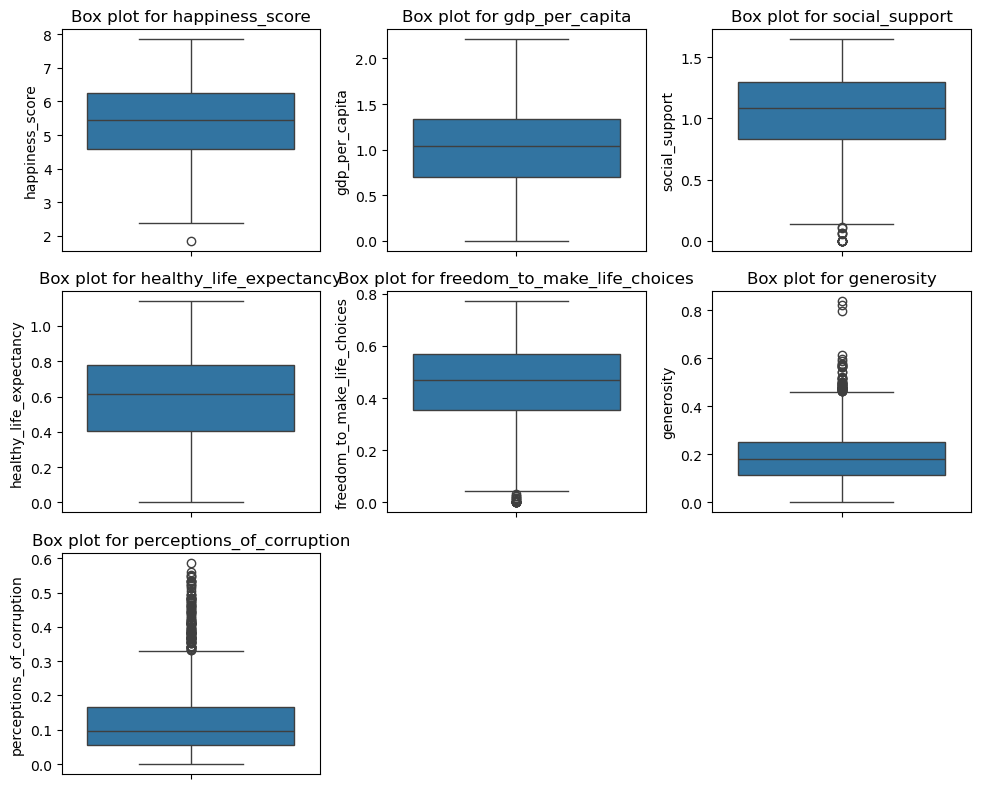

In [17]:
#create a boxplot so i can see the outliers
plt.figure(figsize=(10,8))
for i in range(7):
    plt.subplot(3,3,i+1)
    g=sns.boxplot(y=float_column[i],data=df)
    g.set_title(f"Box plot for {float_column[i]}")
plt.tight_layout()
plt.show()

From the Boxplot above we can observe that generosity and perceptions of corruption have extreme outliers, so we remove them to make future analysis and predictions better


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1365 non-null   object 
 1   region                        1365 non-null   object 
 2   happiness_score               1365 non-null   float64
 3   gdp_per_capita                1365 non-null   float64
 4   social_support                1365 non-null   float64
 5   healthy_life_expectancy       1365 non-null   float64
 6   freedom_to_make_life_choices  1365 non-null   float64
 7   generosity                    1365 non-null   float64
 8   perceptions_of_corruption     1365 non-null   float64
 9   year                          1365 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 117.3+ KB


In [19]:
def remove_outlier(df:pd.Series):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)

    IQR=Q3-Q1

    upper_bound=Q3+1.5*IQR
    lower_bound=Q1-1.5*IQR
    no_outlier_mask=(df<=upper_bound) & (df>=lower_bound)
    return no_outlier_mask

In [20]:
no_outlier_mask_generosity=remove_outlier(df["generosity"])
df=df[no_outlier_mask_generosity]

In [21]:
no_outlier_mask_perception=remove_outlier(df["perceptions_of_corruption"])
df=df[no_outlier_mask_perception]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1203 entries, 1 to 136
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1203 non-null   object 
 1   region                        1203 non-null   object 
 2   happiness_score               1203 non-null   float64
 3   gdp_per_capita                1203 non-null   float64
 4   social_support                1203 non-null   float64
 5   healthy_life_expectancy       1203 non-null   float64
 6   freedom_to_make_life_choices  1203 non-null   float64
 7   generosity                    1203 non-null   float64
 8   perceptions_of_corruption     1203 non-null   float64
 9   year                          1203 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 103.4+ KB


In [23]:
df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000
mean,5.311896,0.975865,1.028263,0.563316,0.433832,0.177821,0.104091,2018.937656
std,1.018694,0.429005,0.328375,0.242584,0.152231,0.092626,0.070890,2.531388
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.559850,0.671620,0.814500,0.381000,0.335285,0.107000,0.053005,2017.000000
50%,5.323000,1.012160,1.056130,0.596000,0.450000,0.171028,0.087633,2019.000000
75%,6.080500,1.279685,1.272940,0.747580,0.548102,0.237036,0.140000,2021.000000
max,7.561000,2.015000,1.644000,1.122000,0.768000,0.459010,0.321000,2023.000000


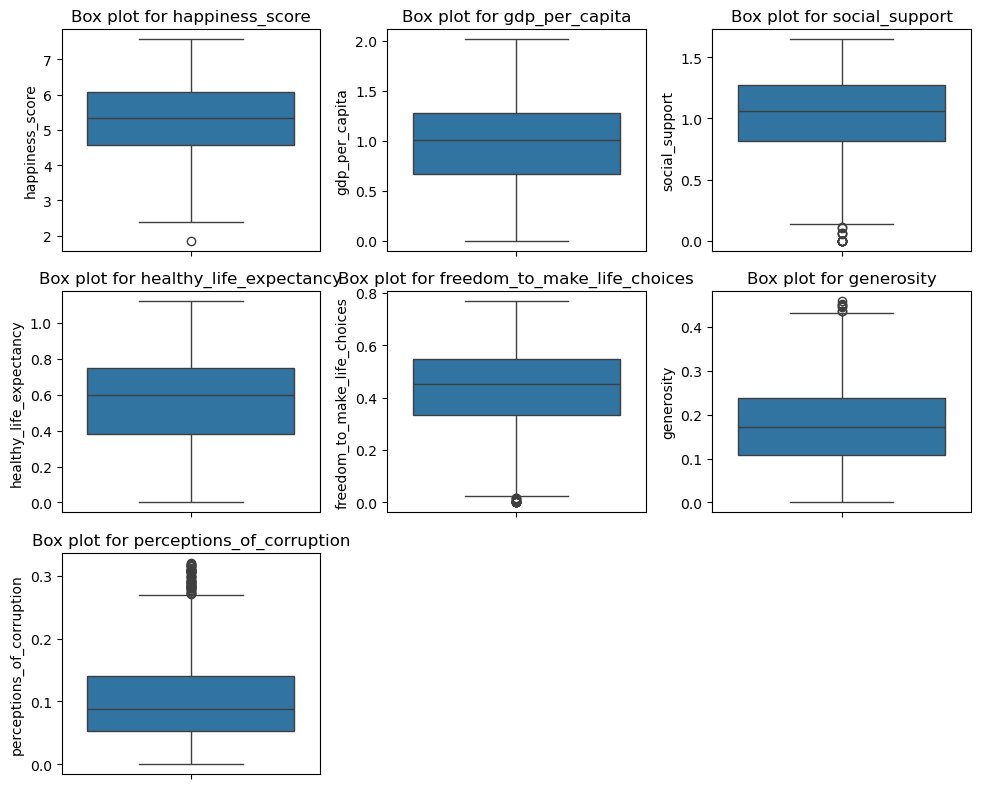

In [24]:
#check it a gain to see if the extreme outlies have been removed
plt.figure(figsize=(10,8))
for i in range(7):
    plt.subplot(3,3,i+1)
    g=sns.boxplot(y=float_column[i],data=df)
    g.set_title(f"Box plot for {float_column[i]}")
plt.tight_layout()
plt.show()

The Extreme outliers have now been removed, Time for futher analysis

In [25]:
missing = df.isnull().sum().sort_values(ascending = False)
missing

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

## Exploratory Data Analysis (EDA)

In [26]:
df.head(10)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
10,Israel,Middle East and North Africa,7.278,1.22857,1.22393,0.91387,0.41319,0.33172,0.07785,2015
11,Costa Rica,Latin America and Caribbean,7.226,0.95578,1.23788,0.86027,0.63376,0.25497,0.10583,2015
12,Austria,Western Europe,7.200,1.33723,1.29704,0.89042,0.62433,0.33088,0.18676,2015
13,Mexico,Latin America and Caribbean,7.187,1.02054,0.91451,0.81444,0.48181,0.14074,0.21312,2015
14,United States,North America and ANZ,7.119,1.39451,1.24711,0.86179,0.54604,0.40105,0.15890,2015
15,Brazil,Latin America and Caribbean,6.983,0.98124,1.23287,0.69702,0.49049,0.14574,0.17521,2015
17,Ireland,Western Europe,6.940,1.33596,1.36948,0.89533,0.61777,0.45901,0.28703,2015
18,Belgium,Western Europe,6.937,1.30782,1.28566,0.89667,0.58450,0.22250,0.22540,2015
22,Venezuela,Latin America and Caribbean,6.810,1.04424,1.25596,0.72052,0.42908,0.05841,0.11069,2015


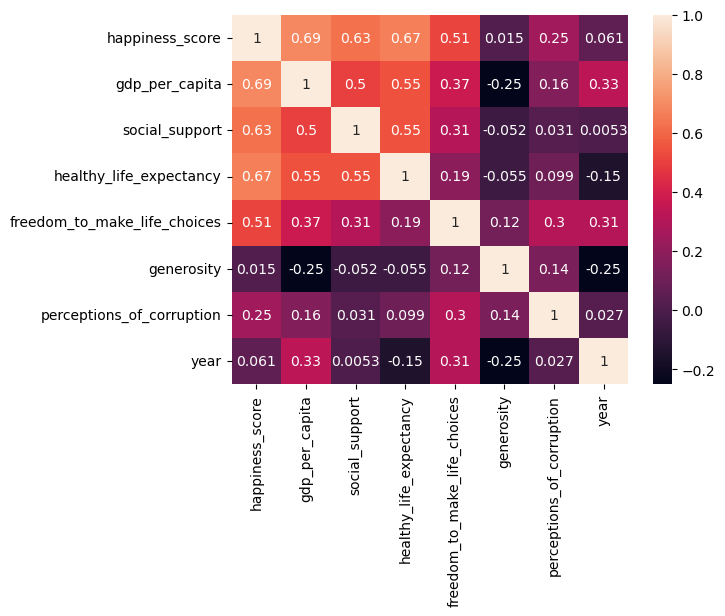

In [27]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

From the heat map above we can see the correlation of the different features. Four are highly correlated:
1. Happiness score
2. GDP per capital 
3. Social Support, and
4. Healty Life Expectancy
   
meaning that as one increases the other does to, which makes sense: the higher GDP most likely the higher the happiness score. If people live longer in the country there tends to be more happiness

freedom to make life choices is correlated too but not as the prefious four

none are negatively corelated to happiness score, so as all this features increase, the happiness score does too

### Distribution of happiness score over the years

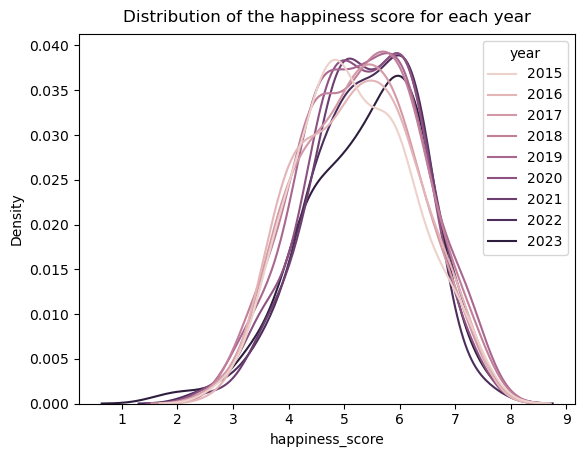

In [28]:
#NOTE TO SELF: Change colour later to realy highlight the years or reduce transparency for some years
g=sns.kdeplot(x="happiness_score",data=df,hue="year")
g.set_title("Distribution of the happiness score for each year",y=1.01)
plt.show()

**Happiness score over the years every year recorded was always between 4 and 6 on average**

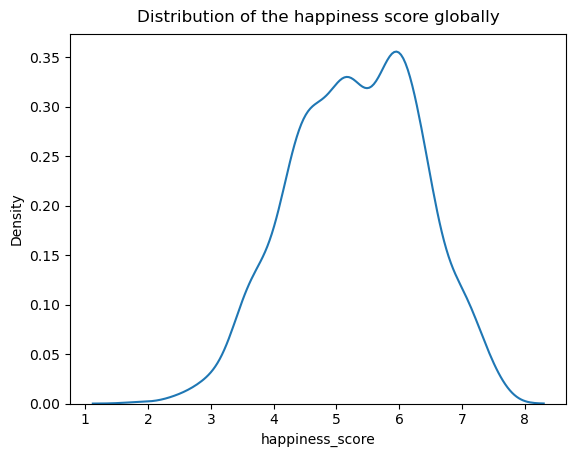

In [29]:
#the KDE curve shows the overall trend of all the countries together unlike the one above with hue 
g=sns.kdeplot(x="happiness_score",data=df)
g.set_title("Distribution of the happiness score globally",y=1.01)
plt.show()

<Axes: xlabel='happiness_score', ylabel='Count'>

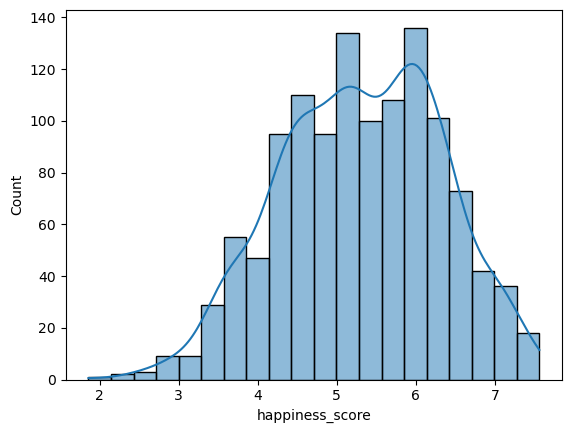

In [30]:
#Unlike the KDE-only plot, this histogram shows the counts of countries in each happiness score range This makes it easier to see both the true frequencies and the general distribution shape.”

sns.histplot(x="happiness_score", data=df, bins=20, kde=True)


**Same insights as the visualizations above this shows that the highest happiness score over the years is 6**

### Highest Happines score over the years and for every year, what country

In [31]:
#First lets get how many countries are in the data set
df["country"].nunique()

160

In [32]:
df["country"].value_counts()

country
Cyprus             11
Lebanon             9
North Macedonia     9
Tajikistan          9
Honduras            9
                   ..
Puerto Rico         1
Congo               1
Djibouti            1
Norway              1
Turkiye             1
Name: count, Length: 160, dtype: int64

In [33]:
df.groupby("country")["year"].nunique().sort_values(ascending=False)
#NOTE TO SELF: Remember to remove countries with less than 5 years of unique years of data TO AVOID NOISE IN MY MODEL

country
Afghanistan    9
Madagascar     9
Niger          9
Nicaragua      9
Nepal          9
              ..
Turkiye        1
Djibouti       1
Congo          1
Norway         1
Indonesia      1
Name: year, Length: 160, dtype: int64

### To get the top 10 over the years

In [34]:
happines_score_by_country=df.groupby("country")["happiness_score"].mean()
top10_happines_score_by_country=pd.DataFrame(happines_score_by_country.sort_values(ascending=False)[:10])
top10_happines_score_by_country

,happiness_score
country,
Norway,7.537000
Iceland,7.527929
Netherlands,7.464500
Canada,7.331500
Israel,7.203733
Australia,7.194500
Austria,7.171150
United Kingdom,7.102667
Puerto Rico,7.039000


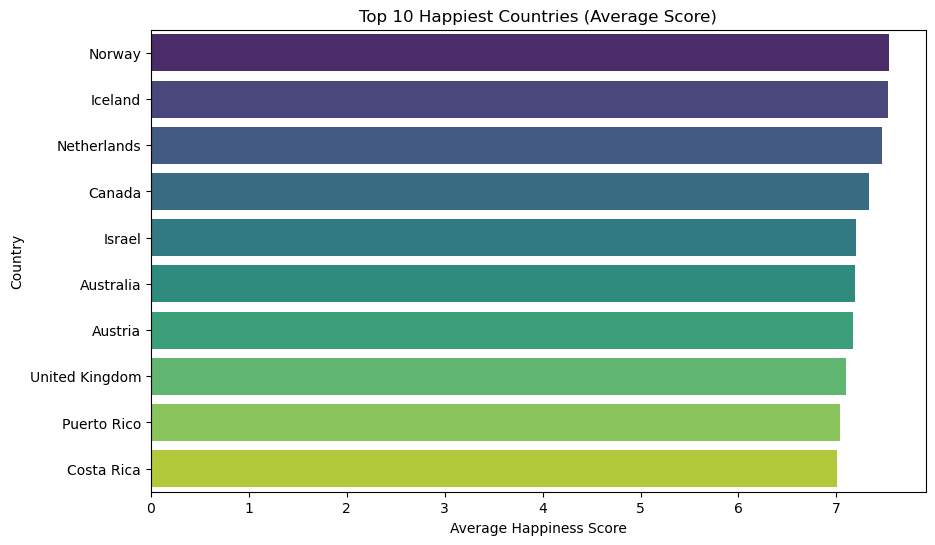

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x=top10_happines_score_by_country["happiness_score"],y=top10_happines_score_by_country.index,palette="viridis")
plt.title("Top 10 Happiest Countries (Average Score)")
plt.xlabel("Average Happiness Score")
plt.ylabel("Country")
plt.show()

**Most happiest countries are in europe, and north america** 

### To compare and contrast, lets get the lowest 10 most happy country over the years

In [36]:
bottom10_happiness_score_by_country = pd.DataFrame(happines_score_by_country.sort_values(ascending=True)[:10])
bottom10_happiness_score_by_country


,happiness_score
country,
Afghanistan,2.990767
Central African Republic,3.202580
South Sudan,3.269320
Burundi,3.277900
Syria,3.462000
Tanzania,3.536133
Haiti,3.589500
Zimbabwe,3.630689
Botswana,3.666878


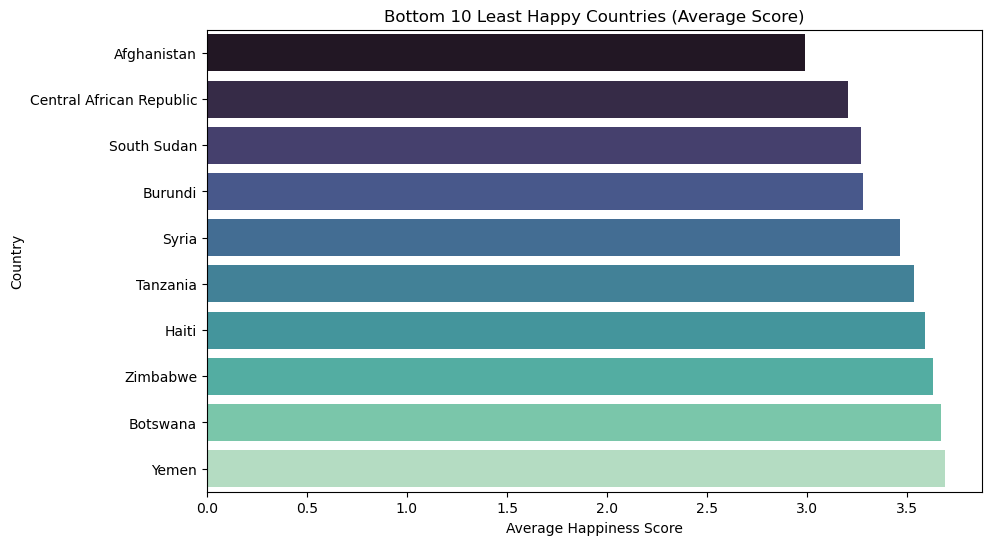

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x=bottom10_happiness_score_by_country["happiness_score"],y=bottom10_happiness_score_by_country.index,palette="mako")
plt.title("Bottom 10 Least Happy Countries (Average Score)")
plt.xlabel("Average Happiness Score")
plt.ylabel("Country")
plt.show()

**THE LOWEST HAPPIEST COUNTRIES ARE IN ASIA AND AFRICA**

## How does Happiness vary in different region

In [38]:
#Start by showing the number of regions in the dataset
df["region"].nunique()

10

In [39]:
df["region"].value_counts()

region
Sub-Saharan Africa                    328
Central and Eastern Europe            210
Latin America and Caribbean           185
Middle East and North Africa          148
Western Europe                        113
South Asia                             56
Southeast Asia                         53
East Asia                              49
Commonwealth of Independent States     44
North America and ANZ                  17
Name: count, dtype: int64

In [40]:
happiness_score_by_region=df.groupby("region")["happiness_score"].mean().sort_values(ascending=False)
happiness_score_by_region=pd.DataFrame(happiness_score_by_region)
happiness_score_by_region

,happiness_score
region,
North America and ANZ,7.109388
Western Europe,6.464835
Latin America and Caribbean,6.050534
East Asia,5.762076
Commonwealth of Independent States,5.639041
Central and Eastern Europe,5.586120
Southeast Asia,5.263521
Middle East and North Africa,5.238687
South Asia,4.438466


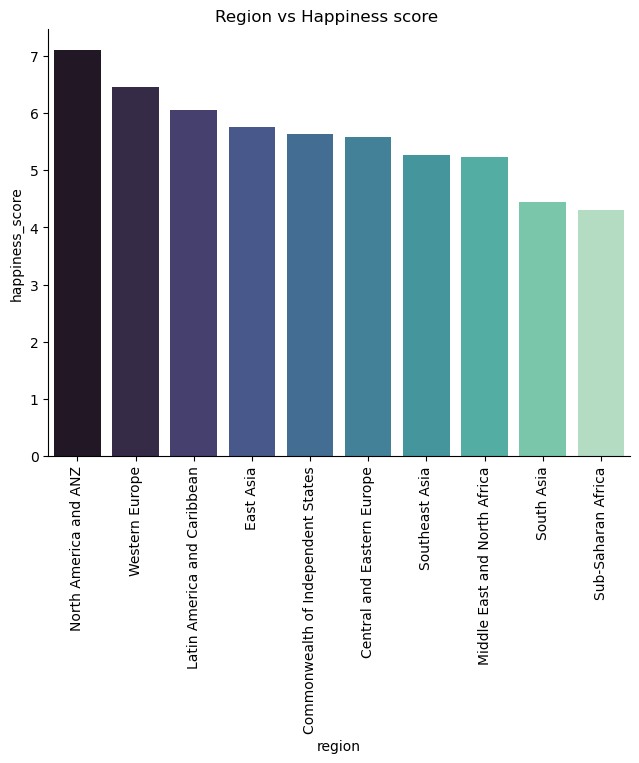

In [41]:
g=sns.catplot(x="region",y="happiness_score",data=happiness_score_by_region,palette="mako",kind="bar",legend=False)
g.fig.suptitle("Region vs Happiness score",y=1.01)
g.figure.set_size_inches(8,5)
plt.xticks(rotation=90)
plt.show()

**AS OBSERVED BEFORE, THE 2 MOST HAPPY COUNTRIES ARE IN NORTH AMERICA AND WESTERN EUROPE**

### Which Regions have highest of some determining faactors and how does it affect

In [42]:
#GDP in each region
GDP_by_regions=df.groupby("region")["gdp_per_capita"].mean().sort_values(ascending=False)
GDP_by_regions=pd.DataFrame(GDP_by_regions)
GDP_by_regions

,gdp_per_capita
region,
North America and ANZ,1.519239
Western Europe,1.426765
East Asia,1.320810
Central and Eastern Europe,1.184865
Middle East and North Africa,1.142104
Latin America and Caribbean,1.035882
Southeast Asia,0.963038
Commonwealth of Independent States,0.892170
South Asia,0.718036


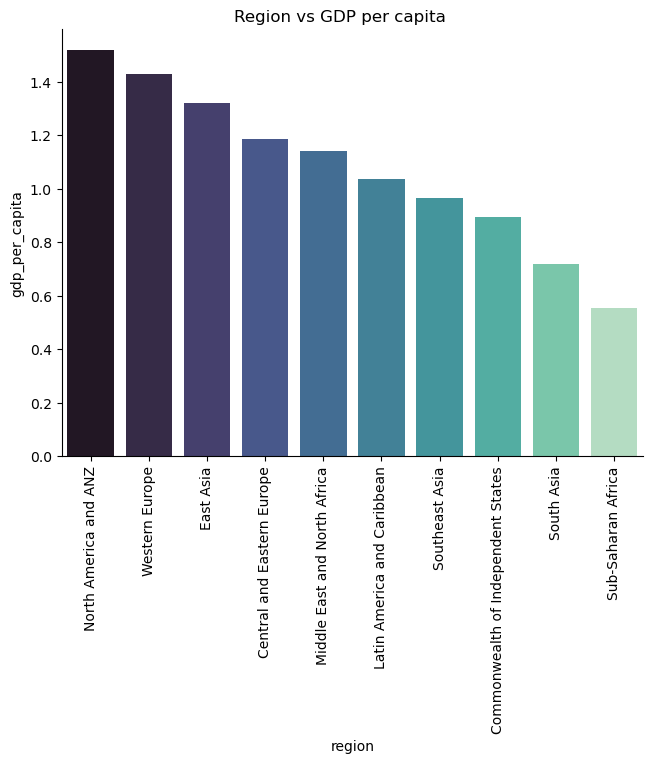

In [43]:
#compare gdp and region
#which regions are the richest and how does it affect happiness
g=sns.catplot(x="region",y="gdp_per_capita",data=GDP_by_regions,palette="mako",kind="bar",legend=False)
g.fig.suptitle("Region vs GDP per capita",y=1.01)
g.figure.set_size_inches(8,5)
plt.xticks(rotation=90)
plt.show()


**COMPARING THE REGION VS HAPPINESS SCORE BAR CHART WITH THE REGION VS GDP PER CAPITAL CHART. THE REGION ARE ALMOST THE SAME SHOWING THAT THE GDP HAS VERY STORNG RELATIONSHIP WITH HAPINESS, HIGHER GDP MEANS HIGHER HAPINESS** 

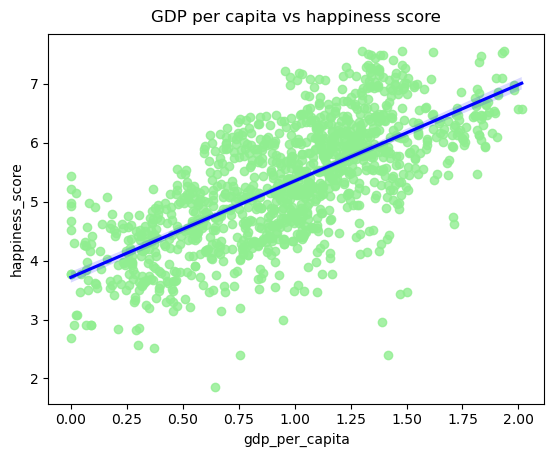

In [44]:
#visualize how it affects hapiness score
g=sns.regplot(x="gdp_per_capita",y="happiness_score",data=df,scatter_kws={"color":"lightgreen"},line_kws={"color":"blue"})
g.set_title("GDP per capita vs happiness score",y=1.01)
plt.show()

In [45]:
**THIS PLOT SHOWS IT MORE CLEARLY, THERE IS A LINEAR CORRELATION BETWEEN GDP AND HAPINESS

SyntaxError: invalid syntax (368616826.py, line 1)

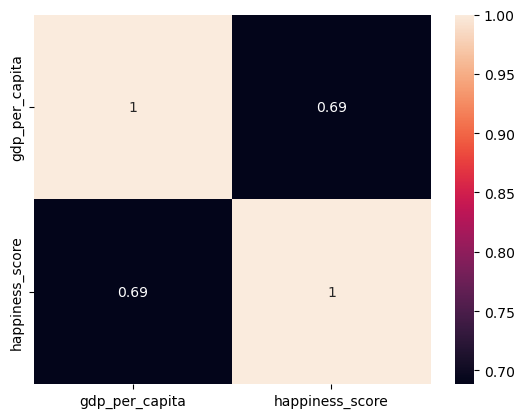

In [46]:
#How high is their linear correlation
sns.heatmap(df[["gdp_per_capita","happiness_score"]].corr(),annot=True)
plt.show()

In [47]:
#lets try for freedom
freedom_by_regions=df.groupby("region")["freedom_to_make_life_choices"].mean().sort_values(ascending=False)
freedom_by_regions=pd.DataFrame(freedom_by_regions)
freedom_by_regions

,freedom_to_make_life_choices
region,
Southeast Asia,0.609719
North America and ANZ,0.570813
Commonwealth of Independent States,0.542065
Latin America and Caribbean,0.514067
Western Europe,0.489711
East Asia,0.442714
South Asia,0.415781
Central and Eastern Europe,0.400103
Sub-Saharan Africa,0.372286


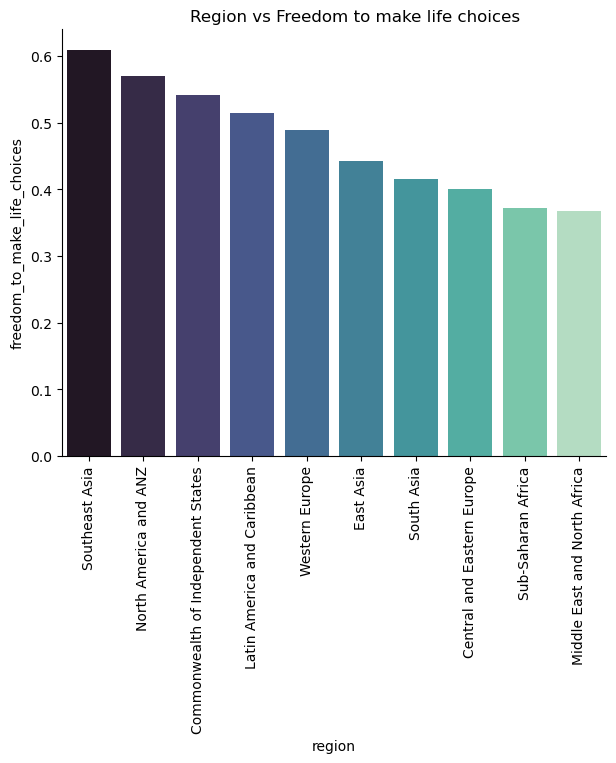

In [48]:
g=sns.catplot(x="region",y="freedom_to_make_life_choices",data=freedom_by_regions,palette="mako",kind="bar",legend=False)
g.fig.suptitle("Region vs Freedom to make life choices",y=1.01)
g.figure.set_size_inches(8,5)
plt.xticks(rotation=90)
plt.show()

**FREEDOM TO MAKE LIFE CHOICES IS CORELATED BUT ITS LESSER THAN GDP**

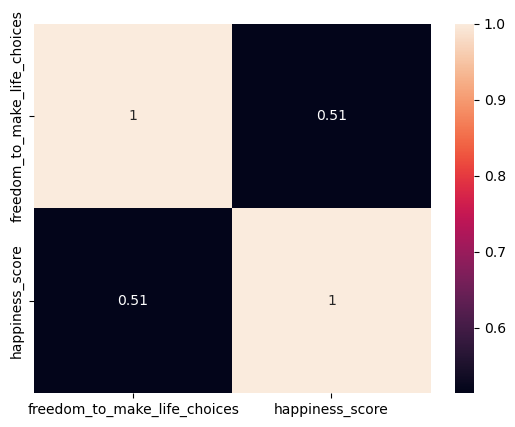

In [49]:
sns.heatmap(df[["freedom_to_make_life_choices","happiness_score"]].corr(),annot=True)
plt.show()

THE INSIGHT ABOVE IS MORE CLEARLY SHOWN HERE

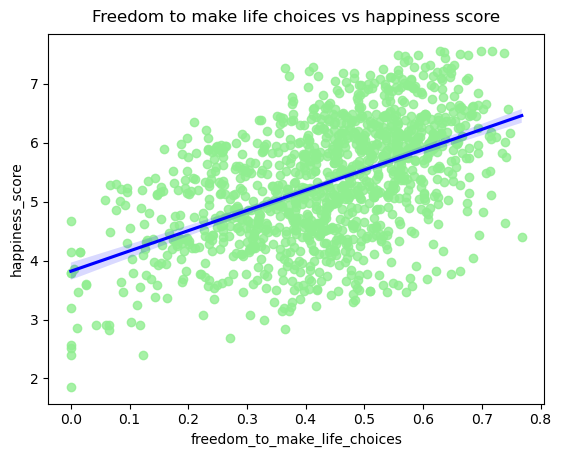

In [50]:
g=sns.regplot(x="freedom_to_make_life_choices",y="happiness_score",data=df,scatter_kws={"color":"lightgreen"},line_kws={"color":"blue"})
g.set_title("Freedom to make life choices vs happiness score",y=1.01)
plt.show()

## Chandes of happiness in top 10 countries over the years 

In [51]:
top_10_countries=df[df["country"].isin(top10_happines_score_by_country.index)]
top_10_countries["country"].value_counts()

country
Israel            9
Costa Rica        9
Austria           8
Iceland           7
Canada            4
Australia         4
United Kingdom    3
Netherlands       2
Puerto Rico       1
Norway            1
Name: count, dtype: int64

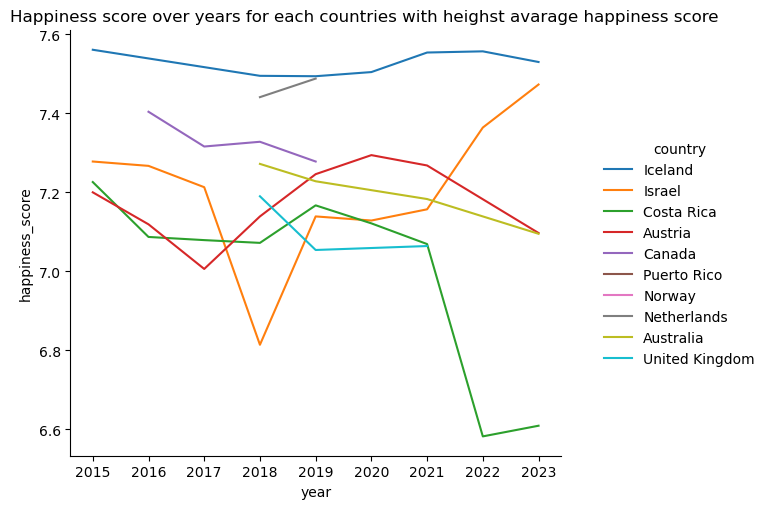

In [52]:
g=sns.relplot(x="year",y="happiness_score",hue="country",kind="line",data=top_10_countries)
g.fig.suptitle("Happiness score over years for each countries with heighst avarage happiness score",y=1.01)
g.fig.set_size_inches(8,5)
plt.show()

ICELAND HAS CONTINOUSLY HAD THE HIGHEST HAPPINESS SCORE OVER THE YEARS

### For 2023, the last year

In [53]:
top10_countries_for_latest_year=df[df["year"]==2023].nlargest(10,"happiness_score")["country"]
top10_countries_for_latest_year

2           Iceland
3            Israel
10          Austria
11        Australia
14    United States
16          Belgium
17          Czechia
19        Lithuania
20           France
21         Slovenia
Name: country, dtype: object

In [54]:
data_for_top_10_countries=df[df["country"].isin(top10_countries_for_latest_year)]
data_for_top_10_countries["country"].value_counts()

country
Israel           9
United States    9
Belgium          9
France           9
Slovenia         9
Lithuania        9
Austria          8
Iceland          7
Australia        4
Czechia          2
Name: count, dtype: int64

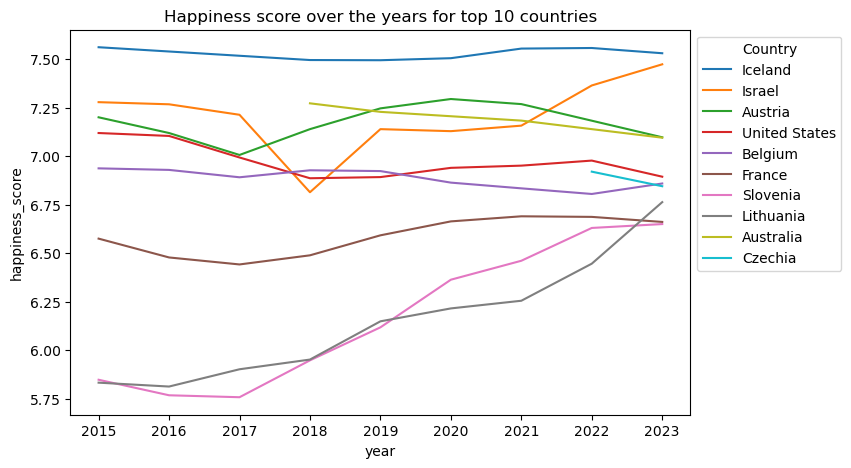

In [55]:
g=sns.lineplot(x="year",y="happiness_score",data=data_for_top_10_countries,hue="country")
g.set_title("Happiness score over the years for top 10 countries")
g.figure.set_size_inches(8,5)
plt.legend(title="Country",bbox_to_anchor=(1, 1))
plt.show()

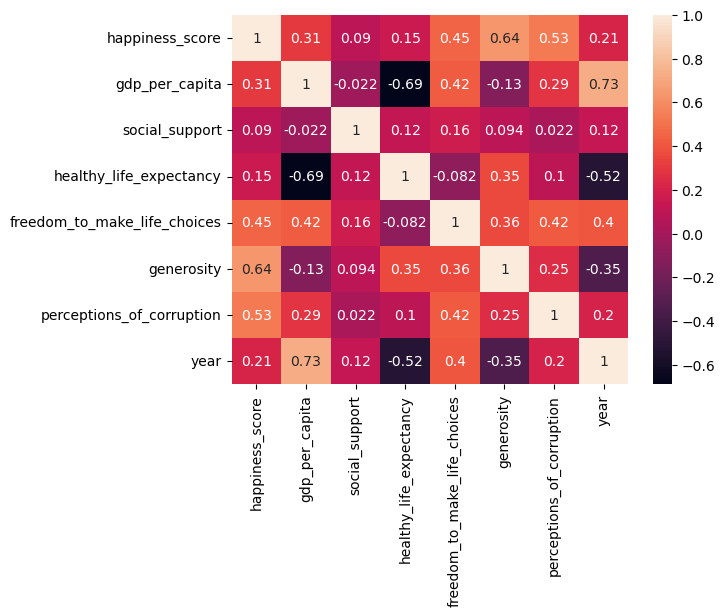

In [56]:
sns.heatmap(data_for_top_10_countries.corr(numeric_only=True),annot=True)
plt.show()

## Insights from the Happiness Data

Most countries score between 4.5 and 6.5.

Only a few (like Iceland) reach 7.5+.


stable, wealthy, free countries are the happiest .

Conflict/poor countries (Afghanistan, South Sudan) are the least happy.


Europe, North America, Oceania are the happiest regions.

Africa, South Asia are the least happy.

Higher income (GDP) = happier.

More freedom & trust in government = happier.

More corruption = less happy.

Longer healthy life = happier.


Stable and rich countries stay happy over time.

Countries with war or crisis drop in happiness.

In 2023, top 10 include IcelandvIsrael Austria Australia United States Belgium Czechia etc

In [78]:
df.to_csv('cleaned_data.csv', index=False)
print('Saved cleaned_data.csv')

Saved cleaned_data.csv
